Gaussian Naive Bayes Training of Data

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import preprocessing
import warnings
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
dataset = pd.read_csv("wdbc.data.csv", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)
X1Labels = attributes[2:12]

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)
X2Labels = attributes[12:22]

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)
X3Labels = attributes[22:32]

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)
X4Labels = attributes[2:22]

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)
X5Labels = attributes[12:]

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)
X6Labels = np.concatenate([X1Labels, X3Labels])

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)
X7Labels = attributes[2:]

labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [3]:
def skNBSolver(final_data):
    report = np.zeros([4, 6]) #row, column
    m,n = final_data.shape
    np.random.seed(0)
    GB = GaussianNB()
    
    for i in range(5):
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        
        scaler = preprocessing.StandardScaler().fit(x_train)
        x_train_scaled = scaler.transform(x_train)
        
        GB.fit(x_train_scaled,y_train)
        GB.fit(x_test,y_test)
        sk_train_acc = GB.score(x_train_scaled,y_train) * 100
        sk_test_acc = GB.score(x_test,y_test) * 100
        predictions = GB.predict(x_test)
    
        report[0,i] = (classification_report(y_test,predictions, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('f1-score'))
        print(classification_report(y_test,predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(4):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)
    
    ##############
    return sk_train_acc, sk_test_acc

In [4]:
#Mean
sk_train_acc1, sk_test_acc1 = skNBSolver(final_data1)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc1))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        75
         1.0       0.94      0.79      0.86        39

    accuracy                           0.91       114
   macro avg       0.92      0.88      0.90       114
weighted avg       0.91      0.91      0.91       114

Confusion matrix:
 [[73  2]
 [ 8 31]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94        71
         1.0       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Confusion matrix:
 [[67  4]
 [ 5 38]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        74
         1.0       0.92      0.82      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.912281,0.921053,0.912281,0.947368,0.912281,0.947368
Precision,0.920314,0.917659,0.913462,0.953887,0.904778,0.953887
Recall,0.884103,0.913691,0.892230,0.924145,0.904778,0.924145
F1 Score,0.898504,0.915590,0.901316,0.937132,0.904778,0.937132



Test accuracy using sklearn: 91.23%



In [5]:
#SE
sk_train_acc2, sk_test_acc2 = skNBSolver(final_data2)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc2))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        75
         1.0       0.94      0.74      0.83        39

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

Confusion matrix:
 [[73  2]
 [10 29]]
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89        71
         1.0       0.88      0.70      0.78        43

    accuracy                           0.85       114
   macro avg       0.86      0.82      0.83       114
weighted avg       0.85      0.85      0.85       114

Confusion matrix:
 [[67  4]
 [13 30]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88        74
         1.0       0.84      0.68      0.75        40

    accuracy                           0.84       114
   macro avg       0.84      0.80      0.82       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.894737,0.850877,0.842105,0.877193,0.868421,0.894737
Precision,0.907501,0.859926,0.842607,0.866997,0.866453,0.907501
Recall,0.858462,0.820668,0.803716,0.842949,0.843802,0.858462
F1 Score,0.876311,0.833319,0.817308,0.853309,0.852929,0.876311



Test accuracy using sklearn: 86.84%



In [6]:
#Max
sk_train_acc3, sk_test_acc3 = skNBSolver(final_data3)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc3))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        75
         1.0       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[73  2]
 [ 1 38]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        71
         1.0       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[68  3]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        74
         1.0       0.92      0.88      0.90        40

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.973684,0.938596,0.929825,0.947368,0.973684,0.973684
Precision,0.968243,0.936508,0.927632,0.945588,0.973986,0.973986
Recall,0.973846,0.932362,0.917230,0.931624,0.968760,0.973846
F1 Score,0.970946,0.934348,0.922051,0.938156,0.971277,0.971277



Test accuracy using sklearn: 97.37%



In [7]:
#Mean and SE
sk_train_acc4, sk_test_acc4 = skNBSolver(final_data4)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc4))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        75
         1.0       0.97      0.77      0.86        39

    accuracy                           0.91       114
   macro avg       0.93      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
 [[74  1]
 [ 9 30]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95        71
         1.0       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion matrix:
 [[70  1]
 [ 7 36]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        74
         1.0       0.94      0.85      0.89        40

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.912281,0.929825,0.929825,0.938596,0.929825,0.938596
Precision,0.929654,0.941032,0.933761,0.947726,0.928205,0.947726
Recall,0.877949,0.911562,0.911486,0.910256,0.918476,0.918476
F1 Score,0.896926,0.922973,0.921053,0.926022,0.922973,0.926022



Test accuracy using sklearn: 92.98%



In [8]:
#SE and Max
sk_train_acc5, sk_test_acc5 = skNBSolver(final_data5)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc5))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[74  1]
 [ 2 37]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        71
         1.0       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion matrix:
 [[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        74
         1.0       0.92      0.85      0.88        40

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.973684,0.947368,0.921053,0.956140,0.964912,0.973684
Precision,0.973684,0.948212,0.920498,0.960157,0.961911,0.973684
Recall,0.967692,0.939404,0.904730,0.938034,0.961911,0.967692
F1 Score,0.970586,0.943452,0.911757,0.948045,0.961911,0.970586



Test accuracy using sklearn: 96.49%



In [9]:
#Mean and Max
sk_train_acc6, sk_test_acc6 = skNBSolver(final_data6)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc6))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        75
         1.0       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[72  3]
 [ 2 37]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        71
         1.0       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix:
 [[68  3]
 [ 4 39]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        74
         1.0       0.95      0.88      0.91        40

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.956140,0.938596,0.938596,0.947368,0.956140,0.956140
Precision,0.948986,0.936508,0.940505,0.945588,0.950397,0.950397
Recall,0.954359,0.932362,0.923986,0.931624,0.955062,0.955062
F1 Score,0.951576,0.934348,0.931367,0.938156,0.952638,0.952638



Test accuracy using sklearn: 95.61%



In [10]:
#Mean, SE and Max
sk_train_acc7, sk_test_acc7 = skNBSolver(final_data7)
print("\nTest accuracy using sklearn: {:.2f}%\n".format(sk_test_acc7))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        75
         1.0       0.97      0.90      0.93        39

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[74  1]
 [ 4 35]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
 [[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        74
         1.0       0.95      0.88      0.91        40

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.956140,0.964912,0.938596,0.956140,0.973684,0.973684
Precision,0.960470,0.967257,0.940505,0.960157,0.973986,0.973986
Recall,0.942051,0.958074,0.923986,0.938034,0.968760,0.968760
F1 Score,0.950327,0.962302,0.931367,0.948045,0.971277,0.971277



Test accuracy using sklearn: 97.37%



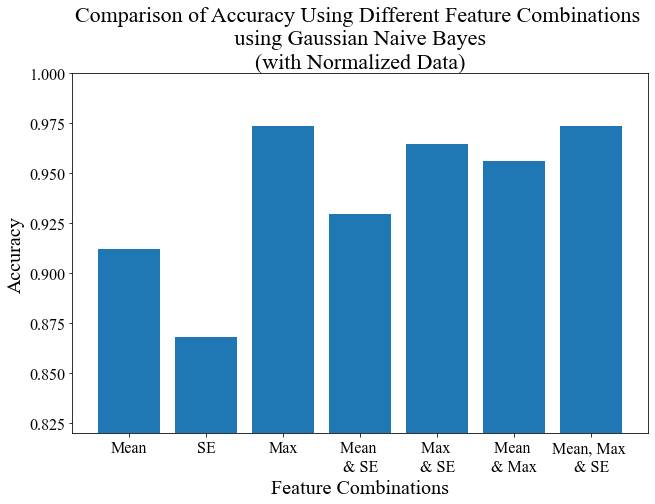

In [21]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
plt.rcParams["font.family"] = "Times New Roman"

feature_comb = ['Mean', 'SE', 'Max', 'Mean \n& SE', 'Max \n& SE', 'Mean \n& Max', 'Mean, Max \n& SE']
accuracy = [sk_test_acc1/100, sk_test_acc2/100, sk_test_acc3/100, sk_test_acc4/100, sk_test_acc5/100, sk_test_acc6/100, sk_test_acc7/100]

ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Comparison of Accuracy Using Different Feature Combinations \n using Gaussian Naive Bayes \n(with Normalized Data)', fontsize = 22)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
    
plt.ylim([0.82, 1])
plt.tight_layout()
plt.savefig('Normalized Dataset.png', bbox_inches = 'tight', dpi = 200)
plt.show()

# Selecting 2 Parameters

In [13]:
# Extracting the columns representing the standard error and maximum values of the features
X = dataset[:,22:32]
X = X.astype("float64")
min_val = np.min(X,axis=0)
max_val = np.max(X,axis=0)
X = np.divide((X-min_val),(max_val-min_val))
final_data = np.concatenate([X,labels],axis=1)
m,n = X.shape

for k in range(5):
    max_f1 = 0
    for i in range(2,n):
        for j in range(i+1,n):
            x = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1)),axis=1)
            final_data = np.concatenate([x,labels],axis=1)
            np.random.shuffle(final_data)
            x_train = final_data[0:int(0.8*m),0:2]
            y_train = final_data[0:int(0.8*m),2]
            x_test  = final_data[int(0.8*m):,0:2]
            y_test  = final_data[int(0.8*m):,2]
            
            scaler = preprocessing.StandardScaler().fit(x_train)
            x_train_scaled = scaler.transform(x_train)
        
            GB.fit(x_train_scaled,y_train)
            GB.fit(x_test,y_test)
            sk_train_acc = GB.score(x_train_scaled,y_train) * 100
            sk_test_acc = GB.score(x_test,y_test) * 100
            predictions = GB.predict(x_test)
            
            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
            
            f1 = (2*r*p)/(r+p)
            if f1>max_f1:
                max_f1 = f1
                index1 = i
                index2 = j
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n".format(X3Labels[index1],X3Labels[index2]))
    print("Indices\n{} and {}\n".format(index1,index2))

F1 = 0.9735950210744068

Feature Combination:
worst_perimeter
worst_smoothness

Indices
2 and 4

F1 = 0.9618431215513703

Feature Combination:
worst_area
worst_symmetry

Indices
3 and 8

F1 = 0.9546540548310366

Feature Combination:
worst_area
worst_symmetry

Indices
3 and 8

F1 = 0.9818297736691107

Feature Combination:
worst_perimeter
worst_symmetry

Indices
2 and 8

F1 = 0.9613906843842761

Feature Combination:
worst_perimeter
worst_fractal_dimension

Indices
2 and 9



# Selecting 4 Parameters

In [15]:
for t in range(5):
    max_f1 = 0
    for i in range(2,n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                            x = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1),X[:,k].reshape(-1,1),X[:,l].reshape(-1,1)),axis=1)
                            final_data = np.concatenate([x,labels],axis=1)
                            np.random.shuffle(final_data)
                            x_train = final_data[0:int(0.8*m),0:4]
                            y_train = final_data[0:int(0.8*m),4]
                            x_test  = final_data[int(0.8*m):,0:4]
                            y_test  = final_data[int(0.8*m):,4]
                            
                            scaler = preprocessing.StandardScaler().fit(x_train)
                            x_train_scaled = scaler.transform(x_train)
        
                            GB.fit(x_train_scaled,y_train)
                            GB.fit(x_test,y_test)
                            sk_train_acc = GB.score(x_train_scaled,y_train) * 100
                            sk_test_acc = GB.score(x_test,y_test) * 100
                            predictions = GB.predict(x_test)
                            
                            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                            f1 = (2*r*p)/(r+p)
                            if f1>max_f1:
                                max_f1 = f1
                                index1 = i
                                index2 = j
                                index3 = k
                                index4 = l
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n{}\n{}\n".format(X3Labels[index1],X3Labels[index2],X3Labels[index3],X3Labels[index4]))
    print("Indices\n{}, {}, {}, {}\n".format(index1,index2,index3,index4))

F1 = 0.9813114754098361

Feature Combination:
worst_perimeter
worst_area
worst_concavity
worst_fractal_dimension

Indices
2, 3, 6, 9

F1 = 0.9803854094975911

Feature Combination:
worst_area
worst_smoothness
worst_concave_points
worst_symmetry

Indices
3, 4, 7, 8

F1 = 0.9802631578947368

Feature Combination:
worst_area
worst_smoothness
worst_concave_points
worst_symmetry

Indices
3, 4, 7, 8

F1 = 0.981329839502129

Feature Combination:
worst_perimeter
worst_area
worst_concavity
worst_concave_points

Indices
2, 3, 6, 7

F1 = 0.9814995131450827

Feature Combination:
worst_perimeter
worst_area
worst_compactness
worst_concave_points

Indices
2, 3, 5, 7



# Selecting 6 Parameters

In [17]:
for t in range(5):
    max_f1 = 0
    indices = [p for p in range(10)]
    for i in range(n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                    indices.remove(i)
                    indices.remove(j)
                    indices.remove(k)
                    indices.remove(l)
                    x = np.concatenate((X[:,indices[0]].reshape(-1,1),X[:,indices[1]].reshape(-1,1),X[:,indices[2]].reshape(-1,1),X[:,indices[3]].reshape(-1,1),X[:,indices[4]].reshape(-1,1),X[:,indices[5]].reshape(-1,1)),axis=1)
                    final_data = np.concatenate([x,labels],axis=1)
                    np.random.shuffle(final_data)
                    x_train = final_data[0:int(0.8*m),0:6]
                    y_train = final_data[0:int(0.8*m),6]
                    x_test  = final_data[int(0.8*m):,0:6]
                    y_test  = final_data[int(0.8*m):,6]
                    
                    scaler = preprocessing.StandardScaler().fit(x_train)
                    x_train_scaled = scaler.transform(x_train)
        
                    GB.fit(x_train_scaled,y_train)
                    GB.fit(x_test,y_test)
                    sk_train_acc = GB.score(x_train_scaled,y_train) * 100
                    sk_test_acc = GB.score(x_test,y_test) * 100
                    predictions = GB.predict(x_test)
                    
                    p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                    r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                    f1 = (2*r*p)/(r+p)
                    if f1 > max_f1:
                        max_f1 = f1
                        optimal_indices = indices
                    indices = [p for p in range(10)]
    print("F1 = {}\n".format(max_f1))
    for i in optimal_indices:
        print(X3Labels[i])
    for i in optimal_indices:
        print(i)
    print("\n")

F1 = 0.9818297736691107

worst_texture
worst_perimeter
worst_area
worst_concavity
worst_concave_points
worst_symmetry
1
2
3
6
7
8


F1 = 1.0

worst_radius
worst_texture
worst_area
worst_smoothness
worst_concave_points
worst_symmetry
0
1
3
4
7
8


F1 = 1.0

worst_radius
worst_texture
worst_area
worst_smoothness
worst_concavity
worst_symmetry
0
1
3
4
6
8


F1 = 0.9911525029103609

worst_radius
worst_perimeter
worst_smoothness
worst_compactness
worst_concavity
worst_concave_points
0
2
4
5
6
7


F1 = 0.9902904352269825

worst_radius
worst_texture
worst_perimeter
worst_area
worst_concavity
worst_symmetry
0
1
2
3
6
8




# Rerunning to test selected parameters

In [19]:
import time

def skNBSolver2(final_data, columns):
    report = np.zeros([4, 6]) #row, column
    m,n = final_data.shape
    np.random.seed(0)
    elapsedTime = 0
    for i in range(5):
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),columns]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,columns]
        y_test  = final_data[int(0.8*m):,n-1]
        
        start = time.monotonic() * 1000
        
        GB.fit(x_train,y_train)
        predictions_test = GB.predict(x_test)
        stop = time.monotonic() * 1000
        elapsedTime = elapsedTime + (stop - start)
        sk_test_acc = GB.score(x_test,y_test) * 100
        
        
        predictions_train = GB.predict(x_train)
        sk_train_acc = GB.score(x_train,y_train) * 100
        
    
        report[0,i] = (classification_report(y_test,predictions, output_dict=True).get('accuracy'))
        report[1,i] = (classification_report(y_test,predictions, output_dict=True).get('macro avg').get('precision'))
        report[2,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('recall'))
        report[3,i] =(classification_report(y_test,predictions, output_dict=True).get('macro avg').get('f1-score'))
        print(classification_report(y_test,predictions))

        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
    
    #reporting the maximum values for each row
    for i in range(4):
        report[i,5]= max(report[i,0:5])
    
    
    columns = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
    index = ["Accuracy", "Precision", "Recall", "F1 Score"]
    df1 = pd.DataFrame(data = report, columns = columns, index = index)
    display(df1)
    elapsedTime = elapsedTime/5
    
    ##############
    return sk_train_acc, sk_test_acc, elapsedTime

In [22]:
columns = [0, 1, 3, 4, 7, 8]
sk_train_acc_feat, sk_test_acc_feat, elapsedTime = skNBSolver2(final_data3, columns)
print("Test Accuracy using 4 features: ", sk_test_acc_feat)
print("Average Elapsed Time: ", elapsedTime)

              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67        76
         1.0       0.27      0.21      0.24        38

    accuracy                           0.54       114
   macro avg       0.45      0.46      0.46       114
weighted avg       0.52      0.54      0.53       114

Confusion matrix:
 [[54 22]
 [30  8]]
              precision    recall  f1-score   support

         0.0       0.64      0.74      0.69        73
         1.0       0.37      0.27      0.31        41

    accuracy                           0.57       114
   macro avg       0.50      0.50      0.50       114
weighted avg       0.54      0.57      0.55       114

Confusion matrix:
 [[54 19]
 [30 11]]
              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67        66
         1.0       0.47      0.29      0.36        48

    accuracy                           0.56       114
   macro avg       0.53      0.52      0.51       11

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,0.543860,0.570175,0.561404,0.517544,0.552632,0.570175
Precision,0.454762,0.504762,0.530952,0.511905,0.492857,0.530952
Recall,0.460526,0.504009,0.524621,0.509245,0.494104,0.524621
F1 Score,0.455147,0.498879,0.512821,0.484163,0.486169,0.512821


Test Accuracy using 4 features:  98.24561403508771
Average Elapsed Time:  12.2
